## Logistic Regression Exercise

1) Load iris datasets from iris-data-clean.csv
   Replace the values in the columns 'Class' as follows:
     "Setosa" = 0
     "Virginica" = 1
     "Versicolor" = 2
     
2) Using Logistic Regression, classify the outcome (Column : 'Class') based on the labels (Columns :'sepal length /cm', 'sepal width /cm', 'petal length /cm', 'petal width /cm')

    a) Provide some values to predict the outcome
    b) Validate the model - print the confusion matrix and the accuracy score

3) Redo the above steps with any two labels
    a) Compare the accuracy score with the model built in the above with four features

###### <font color='red'>1)Load iris datasets from iris-data-clean.csv Replace the values in the columns 'Class' as follows:
    
   <font color='blue'>"Setosa" = 0 "Virginica" = 1 "Versicolor" = 2

In [1]:
# import all required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from IPython.display import display, Markdown



%matplotlib inline

In [2]:
# read data from csv file
df = pd.read_csv('iris-data-clean.csv')
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
140,6.7,3.0,5.2,2.3,Virginica
141,6.3,2.5,5.0,1.9,Virginica
142,6.5,3.0,5.2,2.0,Virginica
143,6.2,3.4,5.4,2.3,Virginica


In [3]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.875862,3.048966,3.835862,1.234483
std,0.820931,0.437975,1.743905,0.750868
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# check datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.8+ KB


In [5]:
# the target column is type object, needs to be converted to numerical value
df['class'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
def func(class_name):
    if class_name == 'Setosa':
        return 1
    if class_name == 'Versicolor':
        return 2
    if class_name == 'Virginica':
        return 3
    

In [7]:
df['class_numeric']=df['class'].apply(lambda x:func(x))

In [8]:
#drop the object class column
df.drop('class', axis = 1,inplace=True)

##### <font color='red'>Plots to understand the data

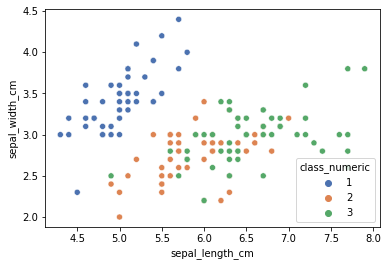

In [9]:
sns.scatterplot(x=df.sepal_length_cm,y=df.sepal_width_cm,hue=df.class_numeric,palette="deep")

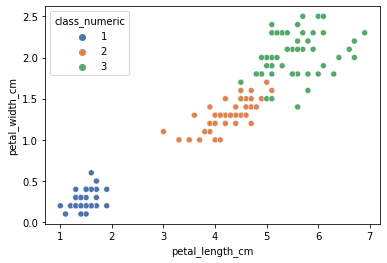

In [10]:
sns.scatterplot(x=df.petal_length_cm,y=df.petal_width_cm,hue=df.class_numeric,palette="deep")

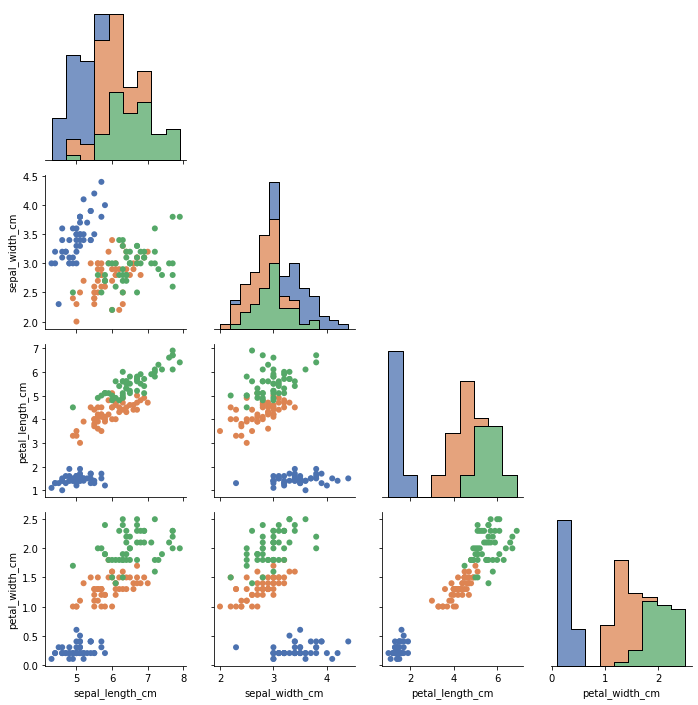

In [11]:

g=sns.PairGrid(data = df, hue='class_numeric', diag_sharey=False,corner=True,palette="deep")
g.map_lower(sns.scatterplot, alpha=1, edgecolor='none')
g.map_diag(sns.histplot, multiple="stack", element="step")


##### <font color='green'> **Observation :** 
    The plots give the information that the relation bw 'petal_length_cm' and 'petal_width_cm' may give better results. also the relation bw 'petal_length_cm' and 'sepal_length_cm' seems good too

##### <font color='red'>2) Using Logistic Regression, classify the outcome (Column : 'Class') based on the labels (Columns :'sepal length /cm', 'sepal width /cm', 'petal length /cm', 'petal width /cm')

In [12]:
# split the data
X=df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']]
y = df['class_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# make the model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

##### <font color='red'> a) Provide some values to predict the outcome



In [14]:
y_pred = model.predict(X_test)

In [15]:
print(y_pred)
print('\n')
print(list(y_test))

[2 3 1 1 1 3 3 3 2 1 1 2 3 3 2 1 3 3 3 2 2 3 1 2 1 2 2 2 3 1 1 1 3 3 1 1 3]


[2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 3, 2, 2, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 2, 2, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3]


##### <font color='red'> b) Validate the model - print the confusion matrix and the accuracy score

In [16]:
acc_score = accuracy_score(y_test,y_pred)

Markdown('Accouracy Score is <strong><font color=\'green\'>{}</strong></font><br/>'.format(acc_score))

Accouracy Score is <strong><font color='green'>0.9459459459459459</strong></font><br/>

In [17]:
def plot_cm(cm,text=''):
    ax = plt.axes()
    sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
    ax.set_title('Confusion Matrix '+text)
    plt.show()


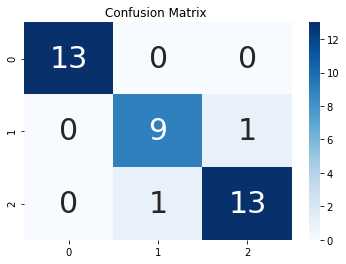

In [34]:
cm =confusion_matrix(y_test,y_pred,labels=[1,2,3])
plot_cm(cm)
#cm


#### <font color='red'> 3) Redo the above steps with any two labels
    a) Compare the accuracy score with the model built in the above with four features

In [19]:
# split the data
# not adding , 'petal_length_cm','petal_width_cm'
X2=df[['petal_length_cm', 'petal_width_cm']]
y = df['class_numeric']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=42)

In [20]:
model2 = LogisticRegression()
model2.fit(X_train2,y_train2)

LogisticRegression()

In [21]:
y_pred2 = model2.predict(X_test2)
print(y_pred2)
print('\n')
print(list(y_test2))

[2 3 1 1 1 3 3 3 2 1 1 2 2 3 2 1 3 2 3 2 2 3 1 2 1 2 2 2 3 1 1 1 3 3 1 1 3]


[2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 3, 2, 2, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 2, 2, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3]


In [22]:
acc_score2 = accuracy_score(y_test2,y_pred2)
Markdown('Accouracy Score is <strong><font color=\'green\'>{}</strong></font><br/>'.format(acc_score2))

Accouracy Score is <strong><font color='green'>0.8918918918918919</strong></font><br/>

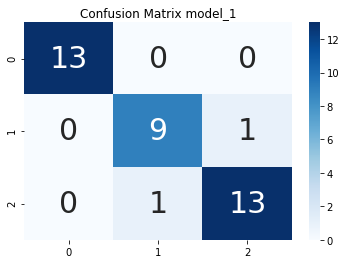

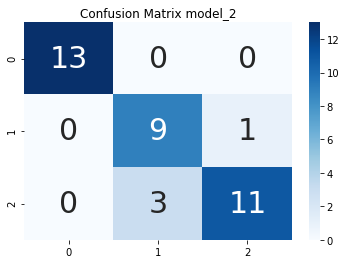

In [35]:
cm2 = confusion_matrix(y_test2,y_pred2,labels=[1,2,3])
plot_cm(cm,text='model_1')
plot_cm(cm2,text='model_2')


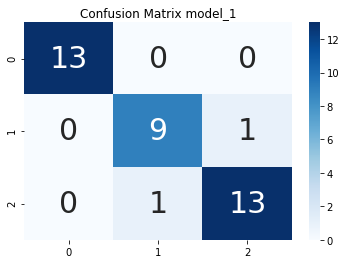

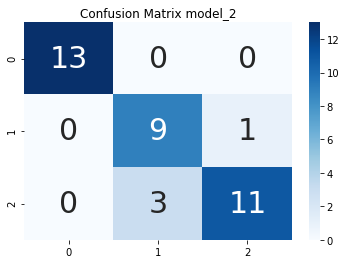

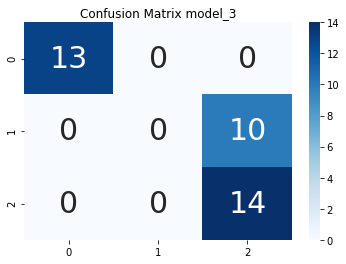

In [36]:
X3=df[['petal_length_cm', 'sepal_length_cm']]
y = df['class_numeric']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, random_state=42)

model3 = LogisticRegression()
model3.fit(X_train3,y_train3)

y_pred3 = model2.predict(X_test3)

acc_score3 = accuracy_score(y_test3,y_pred3)
Markdown('Accouracy Score is <strong><font color=\'green\'>{}</strong></font><br/>'.format(acc_score3))

cm3 = confusion_matrix(y_test3,y_pred3,labels=[1,2,3])
plot_cm(cm,text='model_1')
plot_cm(cm2,text='model_2')
plot_cm(cm3,text='model_3')

In [25]:
Markdown('Accouracy Score is <strong><font color=\'green\'>{}</strong></font><br/>'.format(acc_score3))

Accouracy Score is <strong><font color='green'>0.7297297297297297</strong></font><br/>

### <font color='red'>Predict class from input values

In [26]:
def predict_class(input,clf):
    classes = ["Setosa","Virginica","Versicolor"]
    result = clf.predict(np.array([input]))
    if(result[0] == 1):
        print( classes[0])
        #return classes[0]
    if(result[0] == 2):
        print( classes[1])
        #return classes[1]
    if(result[0] == 3):
        print( classes[2])
        #return classes[2]
    

In [27]:
predict_class([5.1,3.5,1.4,0.2],clf = model)
predict_class([6.7,3.0,5.2,2.3],clf=model)
print("------------------------------------")
predict_class([1.4,0.2],clf = model2)
predict_class([5.2,2.3],clf=model2)
print("------------------------------------")

predict_class([5.1,1.4],clf = model3)
predict_class([6.7,5.2],clf=model3)

Setosa
Versicolor
------------------------------------
Setosa
Versicolor
------------------------------------
Versicolor
Versicolor


#### <font color='red'> test 

(array([ 8., 20., 14., 26., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

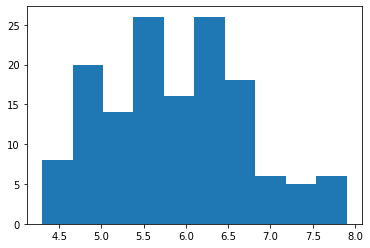

In [28]:
plt.hist(df.sepal_length_cm)

(array([ 4.,  7., 22., 23., 36., 29., 10., 10.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

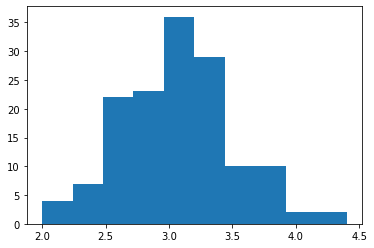

In [29]:
plt.hist(df.sepal_width_cm)

(array([33., 12.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

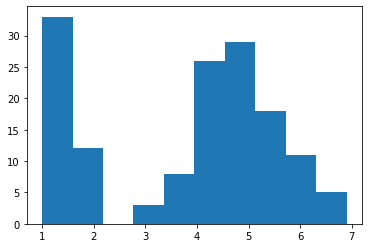

In [30]:
plt.hist(df.petal_length_cm)

(array([36.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

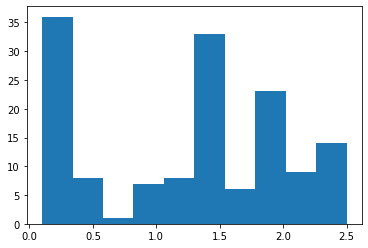

In [31]:
plt.hist(df.petal_width_cm)